**Contents**
1. Import Libraries and Read Dataset
1. Exploratory Data Analysis
1. Cohort Analysis
    * What is cohort analysis?
    * Cohort Analysis with Python
1. RFM Analysis for Customer Segmentation
    * What is RFM Analysis
    * RFM Analysis with Python
1. K-Means Clustering

## Import Libraries and Read Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
# print(os.listdir("Desktop/NIELIT/ML/"))

In [2]:
df = pd.read_excel("Online Retail.xlsx")

## Exploratory Data Analysis

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


In [7]:
def monthly(x):
    return dt.datetime(x.year, x.month, 1)

In [8]:
df['BillMonth'] = df['InvoiceDate'].apply(monthly)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


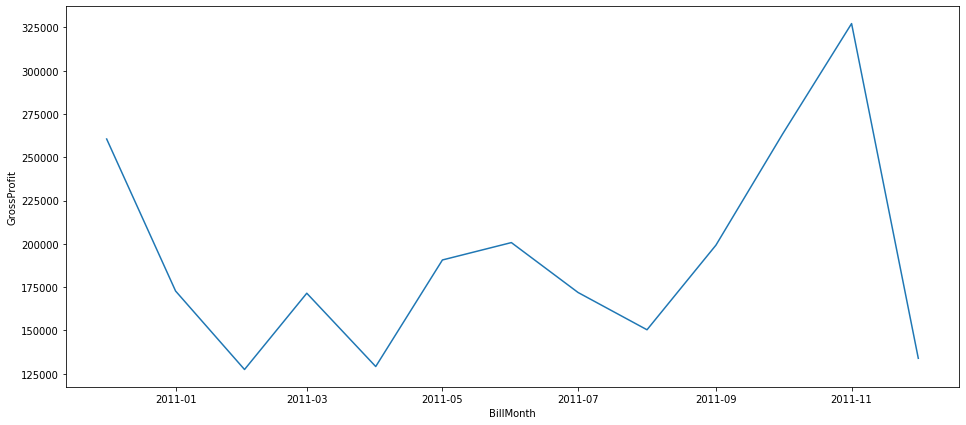

In [9]:
df_sum = df.groupby('BillMonth').sum().drop('CustomerID', axis = 1)
df_sum = df_sum.rename(columns={'UnitPrice' : 'GrossProfit'})

plt.figure(figsize=(16,7))
sns.lineplot(x = df_sum.index, y = df_sum['GrossProfit'])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
BillMonth      541909 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


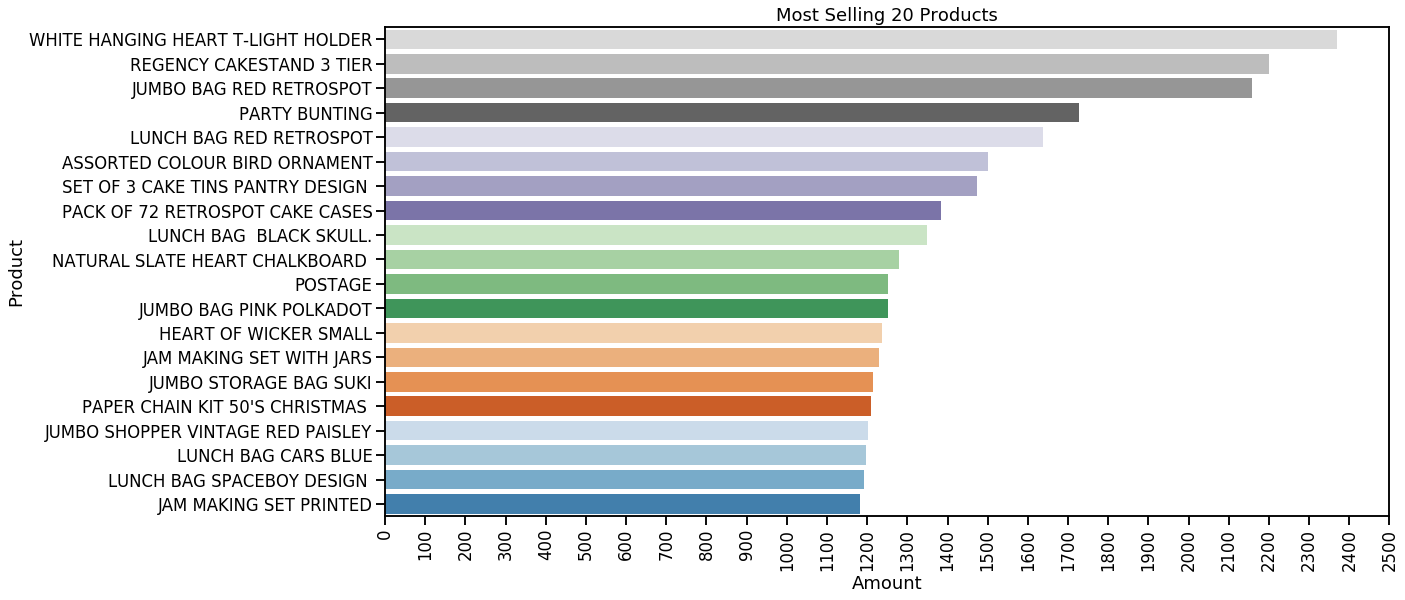

In [11]:
most_selling_products = df['Description'].value_counts()[:20]
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = most_selling_products.values, y = most_selling_products.index,palette = "tab20c_r")
plt.xticks(np.arange(0,2501,100),rotation = 90)
plt.xlabel("Amount")
plt.ylabel("Product")
plt.title("Most Selling 20 Products")

plt.show()

Data can explore more but I will directly jump into cohort analysis and customer segmentation

## Cohort Analysis

### What is cohort analysis?
<br>
Cohort analysis is a subset of behavioral analytics that takes the data from a given data set and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span. Cohort analysis allows a company to “see patterns clearly across the life-cycle of a customer (or user), rather than slicing across all customers blindly without accounting for the natural cycle that a customer undergoes.” By seeing these patterns of time, a company can adapt and tailor its service to those specific cohorts. While cohort analysis is sometimes associated with a cohort study, they are different and should not be viewed as one and the same. Cohort analysis is specifically the analysis of cohorts in regards to big data and business analytics, while in cohort study, data is broken down into similar groups.
[Wikipedia](https://en.wikipedia.org/wiki/Cohort_analysis)
<br>
![](https://cdn-images-1.medium.com/max/1600/0*Rw-Ikx_Qe4q6EAC3.)

### Cohort Analysis with Python

In [12]:
g = df.groupby('CustomerID')['BillMonth']
print(g)
df['CohortMonth'] = g.transform('min')
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,BillMonth,CohortMonth
353617,567818,23293,SET OF 12 FAIRY CAKE BAKING CASES,1,2011-09-22 12:41:00,0.83,14395.0,United Kingdom,2011-09-01,2010-12-01
442809,574682,22383,LUNCH BAG SUKI DESIGN,1,2011-11-06 12:44:00,1.65,14963.0,United Kingdom,2011-11-01,2011-06-01
9275,537196,21745,GAOLERS KEYS DECORATIVE GARDEN,1,2010-12-05 13:55:00,3.75,15426.0,United Kingdom,2010-12-01,2010-12-01
529412,580730,82600,N0 SINGING METAL SIGN,2,2011-12-05 17:28:00,4.13,NaN,United Kingdom,2011-12-01,NaT
101686,544928,20725,LUNCH BAG RED RETROSPOT,1,2011-02-24 18:07:00,4.13,NaN,United Kingdom,2011-02-01,NaT
266297,560250,21975,PACK OF 60 DINOSAUR CAKE CASES,3,2011-07-17 12:31:00,0.55,14659.0,United Kingdom,2011-07-01,2011-01-01
305655,563706,22294,HEART FILIGREE DOVE SMALL,24,2011-08-18 14:48:00,1.25,14189.0,United Kingdom,2011-08-01,2010-12-01
24233,538346,21908,CHOCOLATE THIS WAY METAL SIGN,24,2010-12-10 14:53:00,2.10,17865.0,United Kingdom,2010-12-01,2010-12-01
17908,537781,22818,CARD CHRISTMAS VILLAGE,12,2010-12-08 12:46:00,0.42,17341.0,United Kingdom,2010-12-01,2010-12-01
484033,577519,20985,HEART CALCULATOR,3,2011-11-20 13:20:00,1.25,15044.0,United Kingdom,2011-11-01,2010-12-01


In [13]:
df['CohortMonth'].value_counts()

2010-12-01    177272
2011-01-01     49047
2011-03-01     33646
2011-02-01     30136
2011-04-01     19547
2011-10-01     16428
2011-05-01     15607
2011-09-01     14419
2011-06-01     13686
2011-08-01     12987
2011-11-01     12401
2011-07-01     10657
2011-12-01       996
Name: CohortMonth, dtype: int64

In [14]:
def get_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [15]:
billYear, billMonth = get_int(df, 'BillMonth')
cohortYear, cohortMonth = get_int(df, 'CohortMonth')

In [16]:
diffYear = billYear - cohortYear
diffMonth = billMonth - cohortMonth

In [17]:
df['Month_Index'] = diffYear * 12 + diffMonth + 1

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,BillMonth,CohortMonth,Month_Index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [19]:
df['CohortMonth'] = df['CohortMonth'].apply(dt.datetime.date)

In [20]:
g = df.groupby(['CohortMonth', 'Month_Index'])

In [21]:
cohortData = g['CustomerID'].apply(pd.Series.nunique).reset_index()
cohortCounts = cohortData.pivot(index = 'CohortMonth', columns = 'Month_Index', values = 'CustomerID')
cohortSizes = cohortCounts.iloc[:, 0]
retention = cohortCounts.divide(cohortSizes, axis = 0) * 100
retention

Month_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.42616
2011-01-01,100.0,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371,NaN
2011-02-01,100.0,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526,NaN,NaN
2011-03-01,100.0,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636,NaN,NaN,NaN
2011-04-01,100.0,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.942408,20.418848,23.036649,27.225131,11.518325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.149701,25.149701,25.149701,13.772455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


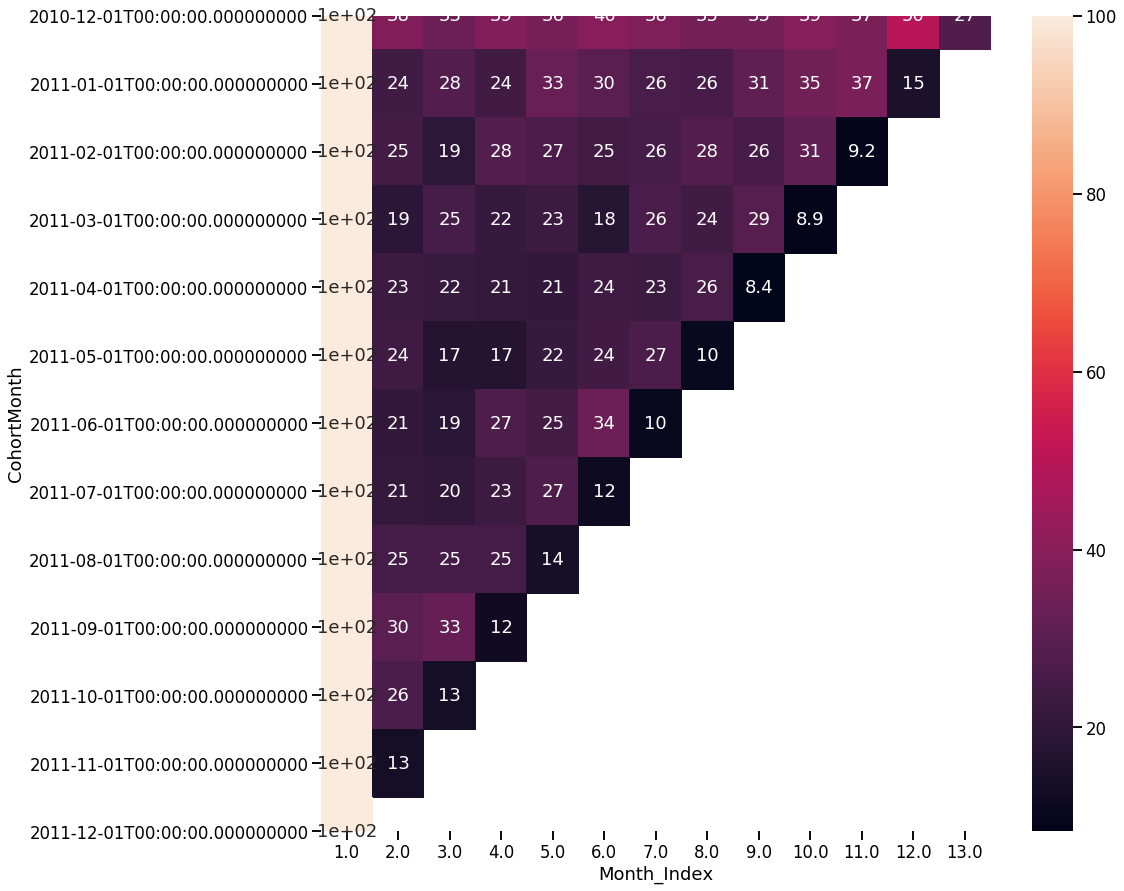

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(retention, annot=True)

In [23]:
g['CustomerID'].apply(pd.Series.nunique).reset_index().pivot(index = 'CohortMonth', columns = 'Month_Index', values = 'CustomerID').iloc[:, 0]

CohortMonth
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1.0, dtype: float64

In [24]:
retention.round(2)

Month_Index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
2011-01-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02-01,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03-01,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04-01,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
month_list = ['Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11']
plt.figure(figsize = (20,10))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(retention.round(2), 
            annot = True, 
            cmap = 'Blues', 
            vmax = list(retention.max().sort_values(ascending = False))[1]+3, 
            fmt =-.1f', 
            linewidth = 0.3, 
            yticklabels=month_list)
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-25-17a533915c8e>, line 8)

## RFM Analysis for Customer Segmentation

### What is RFM analysis?

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.
<br>[more](https://clevertap.com/blog/rfm-analysis/)
<br>
![](https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png)

**Calculate RFM values** <br>
Let's calculate recency, frequency and monetary values. Also we will assume that we want cluster our customers into 5 segments.

In [26]:
calculating_date = max(df.InvoiceDate) + dt.timedelta(days = 1) # We assume that we are doing this analysis 1 day after from latest transaction on the data.

In [27]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

In [28]:
data = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (calculating_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [29]:
recency_labels = range(5, 0, -1)
frequency_labels = range(1, 6)

recency_groups = pd.qcut(data['Recency'], q=5, labels=recency_labels)
frequency_groups = pd.qcut(data['Frequency'], q=5, labels=frequency_labels)

data = data.assign(R=recency_groups.values, F=frequency_groups.values)
print(frequency_groups)

CustomerID
12346.0    1
12347.0    5
12348.0    3
12349.0    4
12350.0    2
          ..
18280.0    1
18281.0    1
18282.0    1
18283.0    5
18287.0    4
Name: Frequency, Length: 4372, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [30]:
monetary_labels = range(1, 6)
monetary_groups = pd.qcut(data['MonetaryValue'], q=5, labels=monetary_labels)

data = data.assign(M=monetary_groups)

data['RFM_Score'] = data[['R','F','M']].sum(axis=1)
data['RFM_Score'].head()

CustomerID
12346.0     3.0
12347.0    15.0
12348.0     9.0
12349.0    12.0
12350.0     5.0
Name: RFM_Score, dtype: float64

In [31]:
def rfm_level(df):
    if df['RFM_Score'] >= 14:
        return 'Platinum Plus'
    elif ((df['RFM_Score'] >= 11) and (df['RFM_Score'] < 14)):
        return 'Platinum'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11)):
        return 'Gold'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Silver'
    else:
        return 'Bronze'

data['RFM_Level'] = data.apply(rfm_level, axis=1)

data.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,3.0,Bronze
12347.0,2,182,4310.00,5,5,5,15.0,Platinum Plus
12348.0,75,31,1797.24,2,3,4,9.0,Gold
12349.0,19,73,1757.55,4,4,4,12.0,Platinum
12350.0,310,17,334.40,1,2,2,5.0,Bronze


In [32]:
rfm_level_agg = data.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

rfm_level_agg

Recency Frequency MonetaryValue      
                 mean      mean          mean count
RFM_Level                                          
Bronze          218.2      11.7         187.4   905
Gold             71.3      48.7         857.2  1106
Platinum         33.0     113.8        1977.9   993
Platinum Plus     9.6     345.5        8037.9   612
Silver          115.7      23.7         395.7   756

## K-Means Clustering

Now we will try to cluster our customers with one of the most used clustering ML algorithm: K-Means! But before do that we have to know some details about K-Means. K-Means assumes your variables have symmetric distributions, they have same average values and same variance. So, we will prepare our data according to this assumptions. 

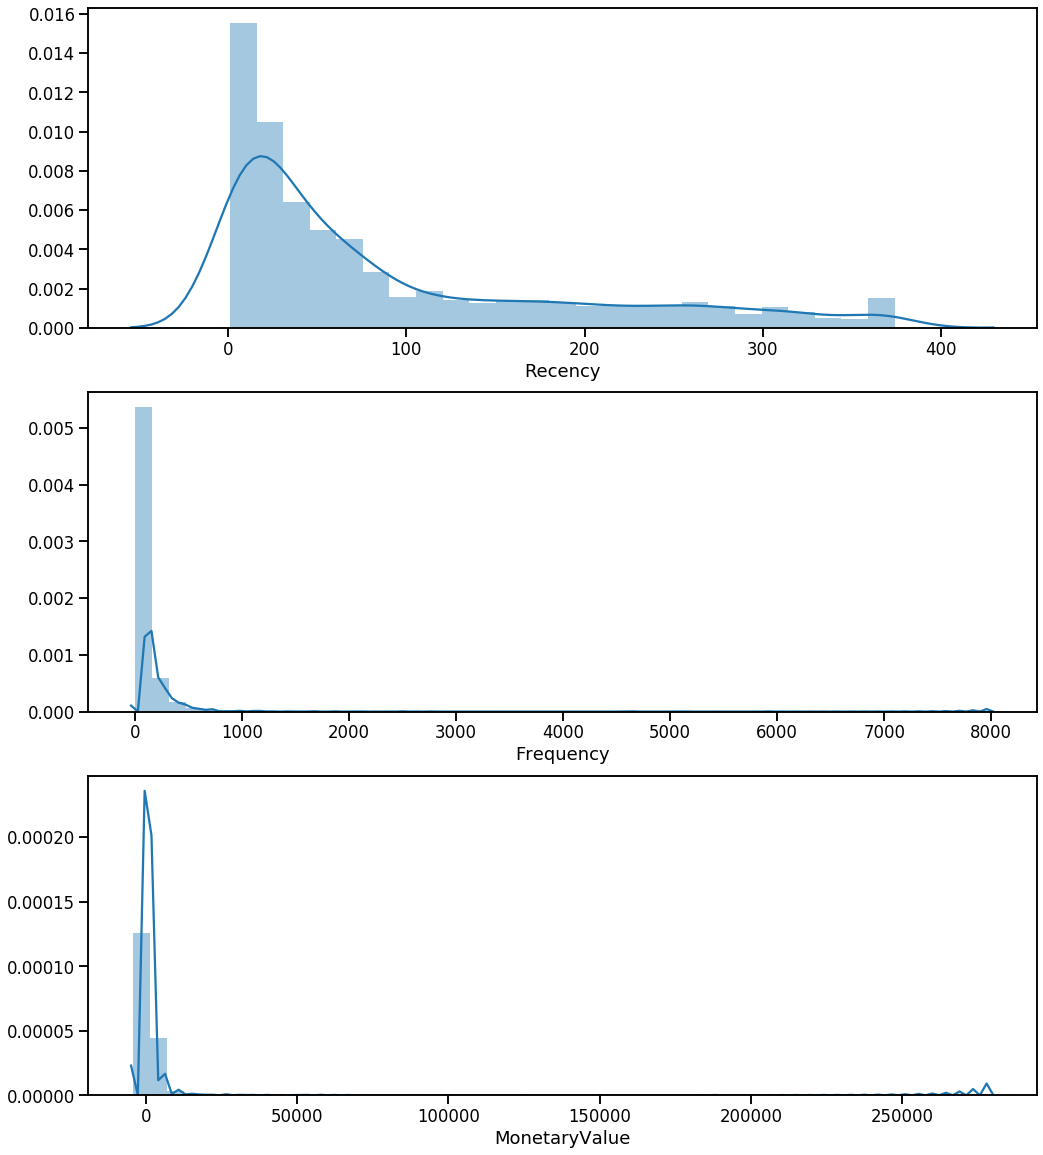

In [33]:
data_rfm = data[['Recency', 'Frequency', 'MonetaryValue']]

plt.figure(figsize = (17,20))
plt.subplot(3, 1, 1); sns.distplot(data_rfm['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_rfm['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data_rfm['MonetaryValue'])
plt.show()

In [34]:
data_rfm.min()

Recency             1.00
Frequency           1.00
MonetaryValue   -4287.63
dtype: float64

Since we will apply log transformation we have to make all values positive.

In [35]:
data_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,92.047118,93.053294,1898.459701
std,100.765435,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,293.362500
50%,50.000000,42.000000,648.075000
75%,143.000000,102.000000,1611.725000
max,374.000000,7983.000000,279489.020000


In [36]:
data_rfm_positive = data_rfm
data_rfm_positive.MonetaryValue = data_rfm.MonetaryValue + abs(data_rfm.MonetaryValue.min()) + 1

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
data_rfm_positive.min()

Recency          1.0
Frequency        1.0
MonetaryValue    1.0
dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler

data_log = np.log(data_rfm)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=data_rfm.index, columns=data_rfm.columns)

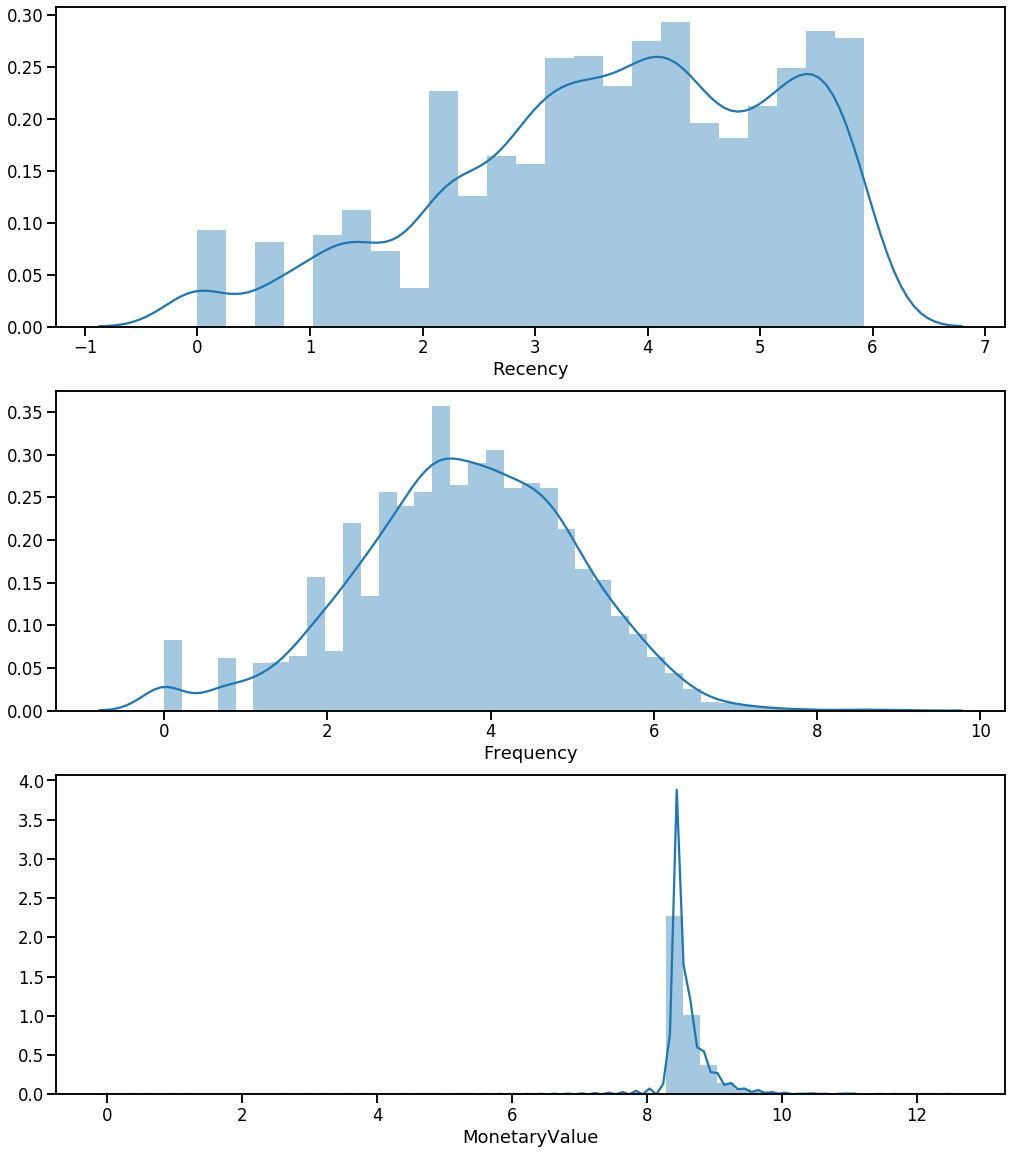

In [39]:
plt.figure(figsize = (17,20))
plt.subplot(3, 1, 1); sns.distplot(data_log['Recency'])
plt.subplot(3, 1, 2); sns.distplot(data_log['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(data_log['MonetaryValue'])
plt.show()

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

In [41]:
data_rfm_k5 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           9.9     815.2       42459.2    77
1          14.7      52.1        5086.9   938
2         107.7      69.6        5312.2  1405
3         183.3      11.4        4577.3  1229
4          15.6     253.7        8187.9   723

To find which 'k' value is more suitable for our data we will use elbow method.

In [42]:
sse = {}
for k in range(1, 21):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

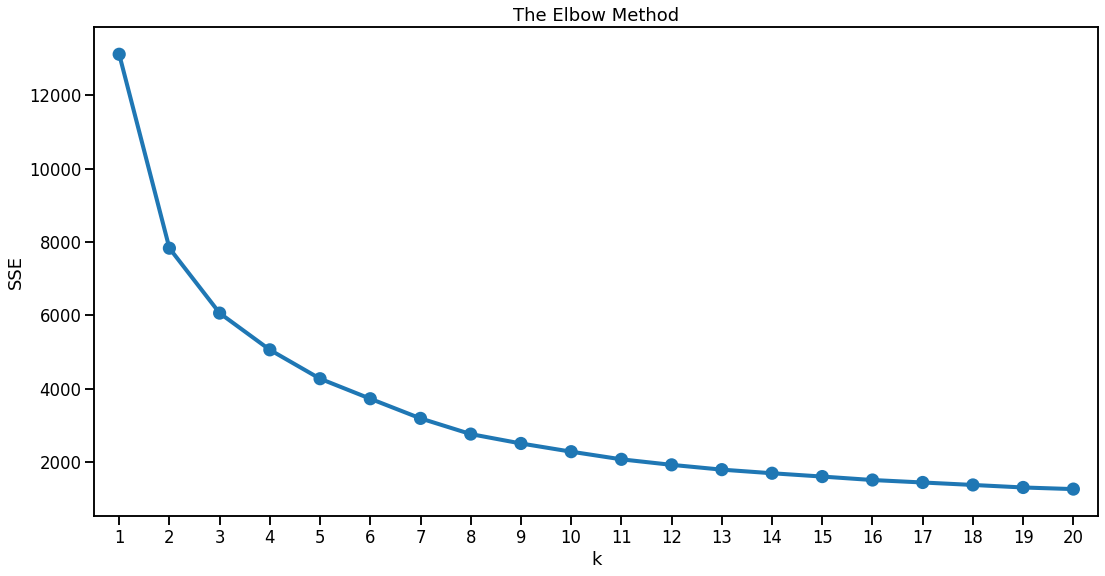

In [43]:
plt.figure(figsize=(18,9))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

We can say 3 is the best k value.

In [44]:
kmeans = KMeans(n_clusters=3, random_state=1) 
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
data_rfm_k3 = data_rfm.assign(Cluster=cluster_labels)
grouped = data_rfm_k3.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.4      97.9        5647.5  1912
1         163.1      22.1        4718.3  2042
2          13.1     417.6       15830.2   418

In [45]:
data_melt = pd.melt(
                    data_rfm_k3.reset_index(),               
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Metric', value_name='Value'
                    )

In [46]:
data_melt.head(10)

,CustomerID,Cluster,Metric,Value
0,12346.0,1,Recency,326.0
1,12347.0,2,Recency,2.0
2,12348.0,1,Recency,75.0
3,12349.0,0,Recency,19.0
4,12350.0,1,Recency,310.0
5,12352.0,0,Recency,36.0
6,12353.0,1,Recency,204.0
7,12354.0,1,Recency,232.0
8,12355.0,1,Recency,214.0
9,12356.0,0,Recency,23.0


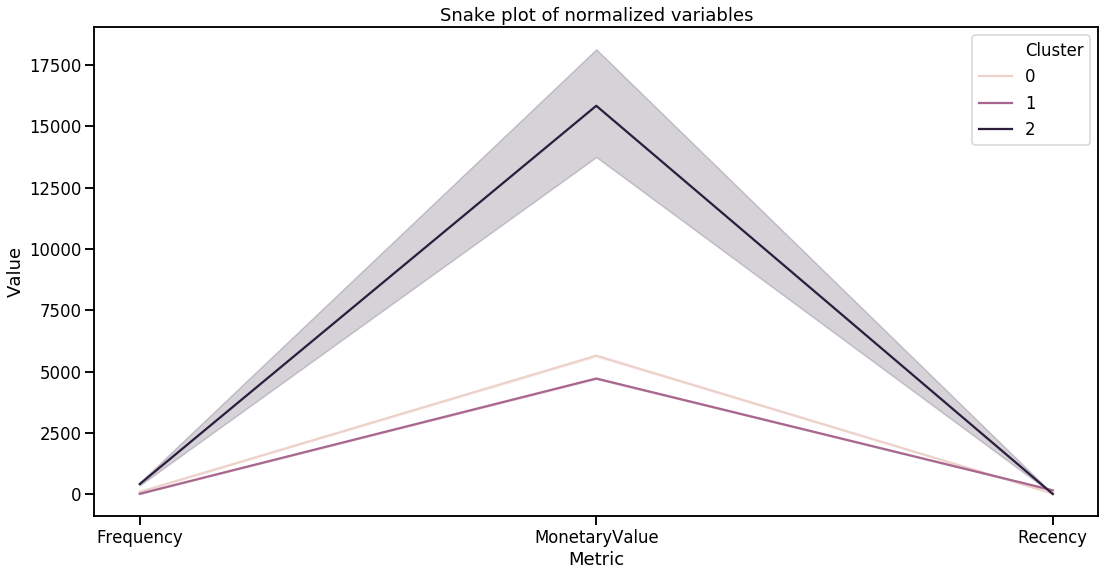

In [47]:
# Snake Plot
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')
sns.lineplot(data=data_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

**Calculate relative importance of each attribute**<br>
Now we will calculate the relative importance of the RFM values within each cluster.

In [48]:
cluster_avg = data_rfm_k3.groupby(['Cluster']).mean() 
population_avg = data_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.64,0.05,-0.09
1,0.77,-0.76,-0.24
2,-0.86,3.49,1.56


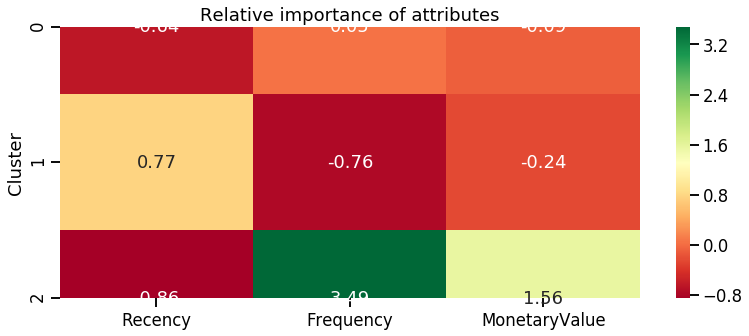

In [49]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [50]:
relative_imp.style.background_gradient(cmap='RdYlGn',axis=1)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.637181,0.0522438,-0.0872044
1,0.772194,-0.762808,-0.237393
2,-0.857728,3.48747,1.55859


### Tenure

In [51]:
tenure_list = []
for i in list(data_rfm.index):
    tenure_list.append((df.InvoiceDate.max() - df[(df.CustomerID == i)]['InvoiceDate'].min()).days + 1)

In [52]:
data_rfmt = data_rfm.assign(Tenure = tenure_list)
data_rfmt.min()

Recency          1.0
Frequency        1.0
MonetaryValue    1.0
Tenure           1.0
dtype: float64

In [53]:
data_rfmt_log = np.log(data_rfmt)
scaler = StandardScaler()
scaler.fit(data_rfmt_log)
data_rfmt_normalized = scaler.transform(data_rfmt_log)

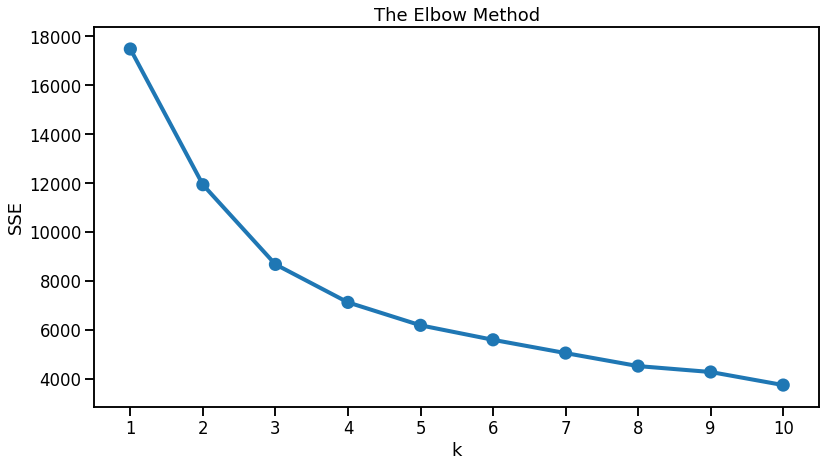

In [54]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_rfmt_normalized)
    sse[k] = kmeans.inertia_ 

plt.figure(figsize = (13,7))
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

3 or 4 ? I'll go with 4.

In [55]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(data_rfmt_normalized)
cluster_labels = kmeans.labels_

In [56]:
data_rfmt_k4 = data_rfmt.assign(Cluster=cluster_labels)
grouped = data_rfmt_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          34.9      35.7        4808.2   50.2   936
1         192.4      24.7        4748.9  257.8  1634
2          11.7     478.0       19098.7  341.7   292
3          34.4     128.1        6101.3  277.6  1510